In [2]:
import pandas as pd
import numpy as np
 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.utils import np_utils
from keras import backend as K

from matplotlib import pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [3]:
# Load given train and test datasets
train_data = pd.read_csv("../data/training/training.csv")

In [4]:
# Check train data dimensions
train_data.shape # 7049 examples or images

(7049, 31)

In [5]:
train_data.head().T 

,0,1,2,3,4
left_eye_center_x,66.0336,64.3329,65.0571,65.2257,66.7253
left_eye_center_y,39.0023,34.9701,34.9096,37.2618,39.6213
right_eye_center_x,30.227,29.9493,30.9038,32.0231,32.2448
right_eye_center_y,36.4217,33.4487,34.9096,37.2618,38.042
left_eye_inner_corner_x,59.5821,58.8562,59.412,60.0033,58.5659
left_eye_inner_corner_y,39.6474,35.2743,36.321,39.1272,39.6213
left_eye_outer_corner_x,73.1303,70.7227,70.9844,72.3147,72.5159
left_eye_outer_corner_y,39.97,36.1872,36.321,38.381,39.8845
right_eye_inner_corner_x,36.3566,36.0347,37.6781,37.6186,36.9824
right_eye_inner_corner_y,37.3894,34.3615,36.321,38.7541,39.0949


15 facial key points each with x and y co-ordinates. Last one is an image with row-ordered pixel values separated by space.

So now the image data will our input and the facial keypoint coordinates for the 15 facial keypoints will be labels to predict.

In [7]:
print(train_data.count())

left_eye_center_x            7039
left_eye_center_y            7039
right_eye_center_x           7036
right_eye_center_y           7036
left_eye_inner_corner_x      2271
left_eye_inner_corner_y      2271
left_eye_outer_corner_x      2267
left_eye_outer_corner_y      2267
right_eye_inner_corner_x     2268
right_eye_inner_corner_y     2268
right_eye_outer_corner_x     2268
right_eye_outer_corner_y     2268
left_eyebrow_inner_end_x     2270
left_eyebrow_inner_end_y     2270
left_eyebrow_outer_end_x     2225
left_eyebrow_outer_end_y     2225
right_eyebrow_inner_end_x    2270
right_eyebrow_inner_end_y    2270
right_eyebrow_outer_end_x    2236
right_eyebrow_outer_end_y    2236
nose_tip_x                   7049
nose_tip_y                   7049
mouth_left_corner_x          2269
mouth_left_corner_y          2269
mouth_right_corner_x         2270
mouth_right_corner_y         2270
mouth_center_top_lip_x       2275
mouth_center_top_lip_y       2275
mouth_center_bottom_lip_x    7016
mouth_center_b

It seems like the facial keypoints are not labeled consistently for all the 7049 examples(images) in the train data.

In [9]:
# How many facial key points have no data
print("Count of facial key points with missing coordinates:")
print(train_data.isnull().any().value_counts())

Count of facial key points with missing coordinates:
True     28
False     3
dtype: int64


So there are 28 facial key points with missing data. 3 of them have all the data. Let's check more details.

In [11]:
# Check count of missing data fpr all 15 facial keypoints
train_data.isnull().sum().sort_values(ascending=False)

left_eyebrow_outer_end_y     4824
left_eyebrow_outer_end_x     4824
right_eyebrow_outer_end_y    4813
right_eyebrow_outer_end_x    4813
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
mouth_left_corner_y          4780
mouth_left_corner_x          4780
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
right_eyebrow_inner_end_y    4779
right_eyebrow_inner_end_x    4779
mouth_right_corner_x         4779
mouth_right_corner_y         4779
left_eye_inner_corner_y      4778
left_eye_inner_corner_x      4778
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_y      33
mouth_center_bottom_lip_x      33
right_eye_center_y             13
right_eye_center_x             13
left_eye_center_y              10
left_eye_center_x              10
nose_tip_x                      0
nose_tip_y    

Except for nose_tip facial key point and the image data, rest of the keypoints have data missing. 
For now, remove the rows with missing data.

Before that let's split the data into train and dev datasets.

In [12]:
# Shuffle data before split
np.random.seed(533)
shuffle = np.random.permutation(np.arange(train_data.shape[0]))
train_data = train_data.iloc[shuffle].reset_index(drop=True)

In [13]:
# First convert the image pixels into numpy array
image_list = []
for i in range(train_data.shape[0]):
    pixel_list = train_data['Image'][i].split(' ')
    pixel_list = ['0' if j == '' else j for j in pixel_list]
    image_list.append(pixel_list)
    
#train_data['Image'] = train_data['Image'].apply(lambda im: np.fromstring(im, sep = ' '))

In [16]:
# Split the image_list(input) into train and dev datasets(80:20 split)
X = np.array(image_list, dtype = 'float')
X_train, X_dev = X[:5640], X[5640:]
print(X_train.shape, X_dev.shape)

(5640, 9216) (1409, 9216)


In [17]:
# Split the labels( facial key point coordinates) into train and dec datasets(80:20 split)
keypoints = train_data.drop('Image', axis = 1)
Y = np.array(keypoints, dtype = 'float')
Y_train, Y_dev = Y[:5640], Y[5640:]
print(Y_train.shape, Y_dev.shape)

(5640, 30) (1409, 30)


In [18]:
# Now remove the rows with missing data in both train and dev datasets
X_train_trim = X_train[~np.isnan(Y_train).any(axis=1)]
Y_train_trim = Y_train[~np.isnan(Y_train).any(axis=1)]
X_dev_trim = X_dev[~np.isnan(Y_dev).any(axis=1)]
Y_dev_trim = Y_dev[~np.isnan(Y_dev).any(axis=1)]

In [19]:
print(X_train_trim.shape)
print(Y_train_trim.shape)
print(X_dev_trim.shape)
print(Y_dev_trim.shape)

(1753, 9216)
(1753, 30)
(387, 9216)
(387, 30)


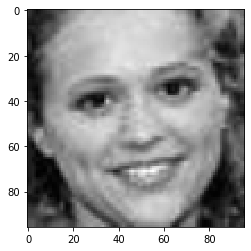

In [20]:
# Display sample image
plt.imshow(X_train[533].reshape(96,96),cmap='gray')
plt.show()

In [21]:
# reshape data for CNN input
X_train_trim = X_train_trim.reshape(-1,96,96,1)
X_dev_trim = X_dev_trim.reshape(-1,96,96,1)

In [80]:
# Single Layer CNN
np.random.seed(533)

# create model
model = Sequential()
model.add(Conv2D(10, (3, 3), activation='relu', input_shape=(96,96,1), data_format='channels_last'))
model.add(Flatten())
model.add(Dense(30))

# define RMSE
def rmse (y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

# compile model
model.compile(loss=rmse, optimizer='adam', metrics=[rmse, 'mae', 'mape'])

# fit model
%time history_cnn = model.fit(X_train_trim, Y_train_trim, epochs=100, shuffle=True, batch_size=32, validation_data=(X_dev_trim, Y_dev_trim), verbose=2)

Train on 1753 samples, validate on 387 samples
Epoch 1/100
 - 1s - loss: 38.2418 - rmse: 38.1335 - mae: 32.8489 - mape: 77.8059 - val_loss: 11.8080 - val_rmse: 11.7207 - val_mae: 9.0047 - val_mape: 19.5696
Epoch 2/100
 - 1s - loss: 10.6198 - rmse: 10.6239 - mae: 8.1108 - mape: 17.7618 - val_loss: 11.8244 - val_rmse: 12.0500 - val_mae: 8.6142 - val_mape: 18.4788
Epoch 3/100
 - 1s - loss: 8.7289 - rmse: 8.7238 - mae: 6.5915 - mape: 14.4014 - val_loss: 10.7097 - val_rmse: 10.4371 - val_mae: 7.9765 - val_mape: 17.0156
Epoch 4/100
 - 1s - loss: 7.3981 - rmse: 7.4048 - mae: 5.4031 - mape: 11.8997 - val_loss: 10.6362 - val_rmse: 10.3130 - val_mae: 7.8822 - val_mape: 16.8133
Epoch 5/100
 - 1s - loss: 7.5857 - rmse: 7.5764 - mae: 5.6568 - mape: 12.7650 - val_loss: 10.9708 - val_rmse: 10.5303 - val_mae: 8.4284 - val_mape: 18.3028
Epoch 6/100
 - 1s - loss: 6.4807 - rmse: 6.4845 - mae: 4.6787 - mape: 10.7081 - val_loss: 10.3218 - val_rmse: 9.9805 - val_mae: 7.7586 - val_mape: 17.0912
Epoch 7/100
 

Epoch 54/100
 - 1s - loss: 2.6102 - rmse: 2.6103 - mae: 1.9035 - mape: 4.3978 - val_loss: 8.9107 - val_rmse: 8.9843 - val_mae: 6.2692 - val_mape: 13.4573
Epoch 55/100
 - 1s - loss: 2.5607 - rmse: 2.5596 - mae: 1.8374 - mape: 4.3329 - val_loss: 8.9856 - val_rmse: 9.0368 - val_mae: 6.3176 - val_mape: 13.6263
Epoch 56/100
 - 1s - loss: 2.3379 - rmse: 2.3399 - mae: 1.6430 - mape: 3.9751 - val_loss: 8.9548 - val_rmse: 9.0152 - val_mae: 6.3350 - val_mape: 13.8774
Epoch 57/100
 - 1s - loss: 2.5237 - rmse: 2.5196 - mae: 1.8241 - mape: 4.4067 - val_loss: 8.9016 - val_rmse: 8.8827 - val_mae: 6.3093 - val_mape: 13.6081
Epoch 58/100
 - 1s - loss: 2.4655 - rmse: 2.4629 - mae: 1.7682 - mape: 4.2774 - val_loss: 8.9584 - val_rmse: 8.9715 - val_mae: 6.3119 - val_mape: 13.5979
Epoch 59/100
 - 1s - loss: 2.5541 - rmse: 2.5508 - mae: 1.8239 - mape: 4.3806 - val_loss: 8.9234 - val_rmse: 8.9466 - val_mae: 6.2898 - val_mape: 13.6247
Epoch 60/100
 - 1s - loss: 2.7675 - rmse: 2.7650 - mae: 2.0360 - mape: 4.736

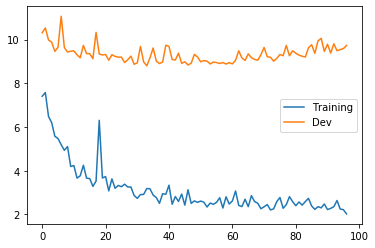

In [87]:

# plot metrics
plt.plot(history_cnn.history['rmse'][3:], label = 'Training')
plt.plot(history_cnn.history['val_rmse'][3:], label = 'Dev')
plt.legend(loc="best")
plt.show()

In [81]:
# Single Layer CNN
np.random.seed(533)

# create model
model = Sequential()
model.add(Conv2D(10, (3, 3), activation='relu', input_shape=(96,96,1), data_format='channels_last'))
model.add(Flatten())
model.add(Dense(30))

# define RMSE
def rmse (y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

# compile model
model.compile(loss=rmse, optimizer='adam', metrics=[rmse, 'mae', 'mape'])

# fit model
%time history_cnn_2 = model.fit(X_train_trim, Y_train_trim, epochs=13, shuffle=True, batch_size=32, validation_data=(X_dev_trim, Y_dev_trim), verbose=2)

Train on 1753 samples, validate on 387 samples
Epoch 1/13
 - 1s - loss: 139.6783 - rmse: 139.1873 - mae: 121.2989 - mape: 293.4897 - val_loss: 16.3767 - val_rmse: 16.6459 - val_mae: 12.5135 - val_mape: 27.6557
Epoch 2/13
 - 1s - loss: 12.9537 - rmse: 12.9490 - mae: 9.9705 - mape: 22.4349 - val_loss: 10.6917 - val_rmse: 10.8970 - val_mae: 8.1782 - val_mape: 18.3978
Epoch 3/13
 - 1s - loss: 9.0491 - rmse: 9.0436 - mae: 7.0177 - mape: 16.1561 - val_loss: 9.9167 - val_rmse: 9.9375 - val_mae: 7.5735 - val_mape: 16.9136
Epoch 4/13
 - 1s - loss: 7.3687 - rmse: 7.3756 - mae: 5.5691 - mape: 12.6432 - val_loss: 9.1665 - val_rmse: 9.3048 - val_mae: 6.8288 - val_mape: 14.9481
Epoch 5/13
 - 1s - loss: 7.0279 - rmse: 7.0205 - mae: 5.3079 - mape: 12.0576 - val_loss: 8.6613 - val_rmse: 8.8144 - val_mae: 6.3363 - val_mape: 13.9309
Epoch 6/13
 - 1s - loss: 5.6211 - rmse: 5.6233 - mae: 4.0898 - mape: 9.3105 - val_loss: 8.7436 - val_rmse: 8.9365 - val_mae: 6.4198 - val_mape: 14.1828
Epoch 7/13
 - 1s - los

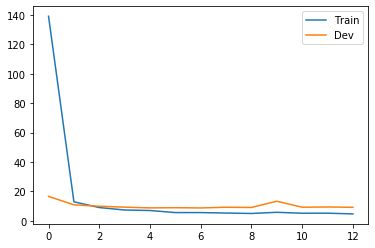

In [82]:
# plot metrics
plt.plot(history_cnn_2.history['rmse'], label = 'Train')
plt.plot(history_cnn_2.history['val_rmse'], label = 'Dev')
plt.legend(loc="best")
plt.show()

In [83]:

# look at final RMSE value after 10 epochs
print(history_cnn_2.history.get('val_rmse')[-1])
print(history_cnn_2.history.get('rmse')[-1])

9.193746566772461
4.714013


In [84]:
# Predict on dev data
dev_predict = model.predict(X_dev_trim)

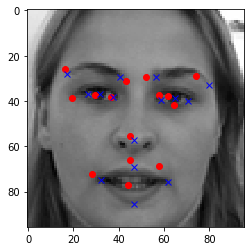

In [85]:
# Plot dev prediction with a random image
n = 16

xv = X_dev_trim[n].reshape((96,96))
plt.imshow(xv,cmap='gray')

for i in range(1,31,2):
    plt.plot(dev_predict[n][i-1], dev_predict[n][i], 'ro')
    plt.plot(Y_dev_trim[n][i-1], Y_dev_trim[n][i], 'x', color='blue')

plt.show()